# LangGraph Agent
## _With_ tools|

## Library Imports

In [14]:
from langchain_core.messages import HumanMessage
from langchain_anthropic import ChatAnthropic
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, START, StateGraph, MessagesState
import logging
from IPython.display import Image, Markdown, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles
from swc_toolkit import SportsWorldCentralToolkit
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode
from typing import Literal

## Configure logging

In [9]:
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging.basicConfig(
    filename='langgraph_notebook.log',
    level=logging.INFO,
)

## Create toolkit

In [10]:
swc_toolkit = SportsWorldCentralToolkit()
tools = swc_toolkit.get_tools()

## Configure Agent and Model

In [11]:
tool_node = ToolNode(tools)

model = ChatAnthropic(model="claude-3-5-sonnet-20240620",
                     temperature=0).bind_tools(tools)

def should_continue(state: MessagesState) -> Literal["tools", END]:
    messages = state['messages']
    last_message = messages[-1]
    if last_message.tool_calls:
        return "tools"
    return END

def call_model(state: MessagesState):
    messages = state['messages']
    response = model.invoke(messages)
    return {"messages": [response]}

workflow = StateGraph(MessagesState)

workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

workflow.add_edge(START, "agent")

workflow.add_conditional_edges(
    "agent",
    should_continue,
)

workflow.add_edge("tools", 'agent')

checkpointer = MemorySaver()

app = workflow.compile(checkpointer=checkpointer)

## Visualize the Graph

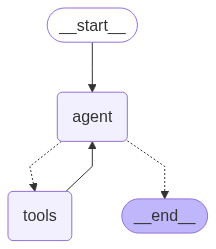

In [12]:
display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

## Chat with the Agent

In [6]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="What teams did Joe Montana play for?")]},
    config={"configurable": {"thread_id": 99}}
)
display(Markdown(final_state["messages"][-1].content))

Joe Montana played for two NFL teams during his professional football career:

1. San Francisco 49ers (1979-1992): Montana spent the majority of his career with the 49ers, where he became a legend and won four Super Bowl championships.

2. Kansas City Chiefs (1993-1994): After being traded by the 49ers, Montana played his final two NFL seasons with the Chiefs.

Before his professional career, Montana played college football for the University of Notre Dame from 1975 to 1978.

In [7]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="What are the leagues in the SportsWorldCentral fantasy football platform?")]},
    config={"configurable": {"thread_id": 99}}
)
display(Markdown(final_state["messages"][-1].content))

I apologize, but I don't have any specific information about leagues in a fantasy football platform called "SportsWorldCentral". Fantasy football platforms can vary widely in their league structures and offerings, and I'm not familiar with this particular one. If this is a real platform, you may want to check their official website or documentation for accurate information about their league types and structures. If you have more general questions about fantasy football leagues, I'd be happy to help with those.

In [13]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="What are the leagues in the \
    SportsWorldCentral fantasy football platform? Keep the response simple.")]},
    config={"configurable": {"thread_id": 99}}
)
display(Markdown(final_state["messages"][-1].content))

I apologize, but it appears that there might be a problem with the API or the connection to the SportsWorldCentral platform at the moment. Both the ListLeagues and HealthCheck functions are returning errors.

Since I'm unable to fetch the information directly from the platform right now, I can't provide you with the specific leagues in the SportsWorldCentral fantasy football platform. 

Is there anything else you'd like to know about fantasy football in general, or would you like me to try the API call again later?